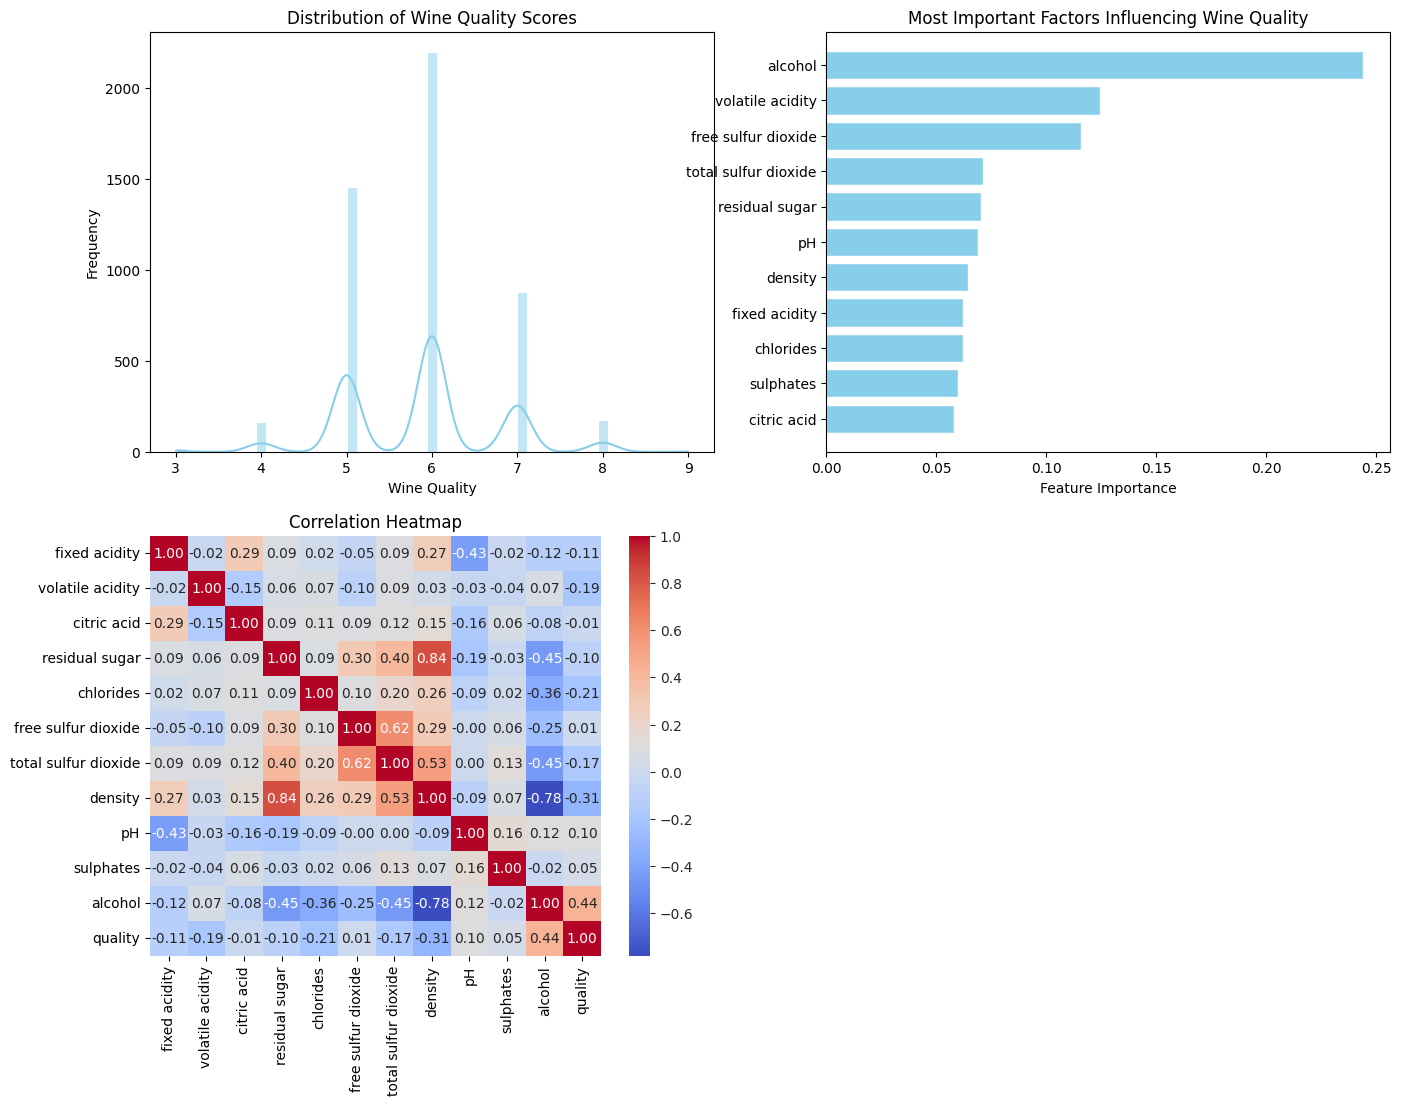

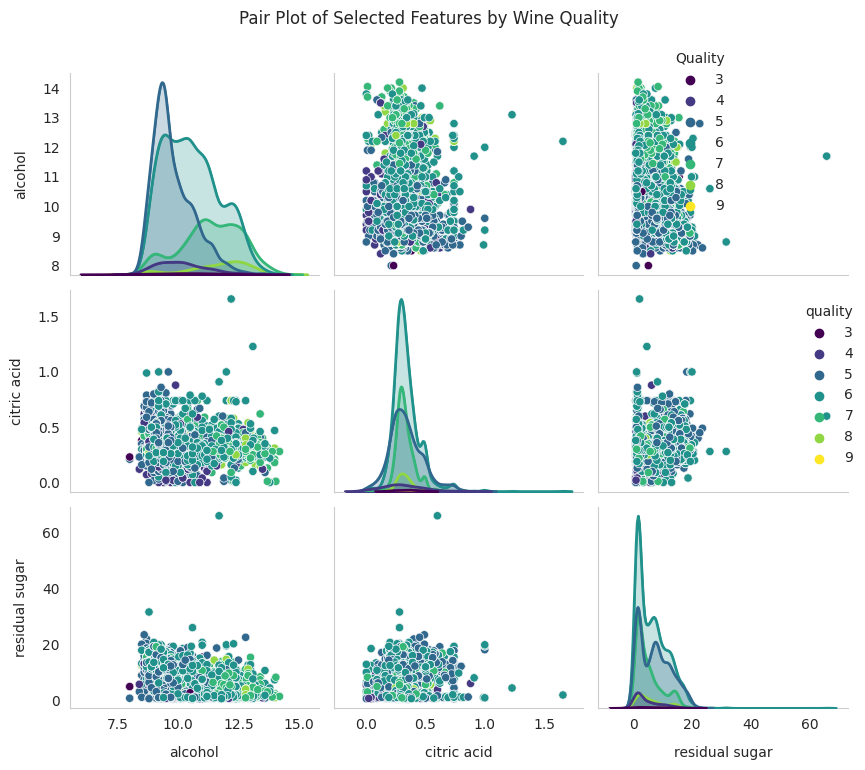

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import numpy as np
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# Load the dataset from the provided URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data = pd.read_csv(url, sep=';')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Question 1: What is the distribution of the wine quality scores?
sns.set_style('whitegrid', {'axes.grid': False})
sns.histplot(data=wine_data, x='quality', kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Wine Quality')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Wine Quality Scores')

# Question 2: What is the relationship between the different features and wine quality?
# Create a 3D scatter plot for two features and wine quality
scatter_3d = sp.make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
scatter_3d_fig = px.scatter_3d(wine_data, x='alcohol', y='citric acid', z='residual sugar', color='quality', opacity=0.7, size_max=10)
for trace in scatter_3d_fig.data:
    scatter_3d.add_trace(trace)
scatter_3d.update_layout(
    scene=dict(
        xaxis_title='Alcohol',
        yaxis_title='Citric Acid',
        zaxis_title='Residual Sugar',
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    title='3D Scatter Plot of Wine Features vs. Quality',
)
scatter_3d_axes = scatter_3d_fig.to_dict()['layout']['scene']
scatter_3d_axes['xaxis']['title'] = 'Alcohol'
scatter_3d_axes['yaxis']['title'] = 'Citric Acid'
scatter_3d_axes['zaxis']['title'] = 'Residual Sugar'
scatter_3d.update_layout(scene=scatter_3d_axes)
scatter_3d_fig.update_traces(marker=dict(size=5))
scatter_3d.show()

# Question 3: What are the most important factors that influence the quality of wine?
# Correlation heatmap
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap')

# Pair plots for selected features by wine quality
selected_features = ['alcohol', 'citric acid', 'residual sugar']
# Customize the style of the pair plots
pair_plot = sns.pairplot(data=wine_data, vars=selected_features, hue='quality', palette='viridis', diag_kind='kde',
                        plot_kws={'alpha': 0.5, 's': 30, 'edgecolor': 'k'})
# Add titles and adjust plot layout
pair_plot.fig.suptitle('Pair Plot of Selected Features by Wine Quality', y=1.02)
pair_plot._legend.set_bbox_to_anchor([0.85, 0.85])
# Customize legend labels
pair_plot._legend.set_title('Quality')
labels = ['3', '4', '5', '6', '7', '8', '9']
for t, l in zip(pair_plot._legend.texts, labels):
    t.set_text(l)
# Adjust plot aesthetics
pair_plot.map_offdiag(sns.scatterplot)
pair_plot.map_diag(sns.kdeplot, lw=2, color='k')
pair_plot.add_legend()
pair_plot_axes = pair_plot.fig.get_axes()
for ax in pair_plot_axes:
    ax.set_xlabel(ax.get_xlabel(), labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), labelpad=10)
axes[1, 1].remove()  # Remove empty subplot

# Question 4: What are the most important factors that influence the quality of wine? (Bar Graph)
# Separate features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
# Fit a Random Forest model to determine feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
# Create a colorful bar chart for feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)
axes[0, 1].barh(feature_importances.index, feature_importances.values, color='skyblue')
axes[0, 1].set_xlabel('Feature Importance')
axes[0, 1].set_title('Most Important Factors Influencing Wine Quality')
axes[0, 1].invert_yaxis()  # Invert y-axis to display most important factors at the top

plt.subplots_adjust(wspace=0.4)
# Display the plot
plt.tight_layout()
plt.show()